LAB 02 - SIS420  --  
Hector Daniel Vargas Gonzales   --   
Ingenieria de Sistemas

En este laboratorio se usara el data set https://www.kaggle.com/datasets/neuromusic/avocado-prices se toma como variables la cantidad de cajas de aguacates que son en 2 tamaños grandes y pequeñas, para calcular el volumen pronosticado.
enlace a github   https://github.com/HD-VG/SIS420.git


#Conectamos a Google Drive y Seleccionamos los datos a utilizar en estos ejercicios

Conectamos con Google Drive

In [87]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Realizamos las Importaciones Necesarias

In [88]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
import matplotlib.pyplot as plt

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

cargamos el dataset y selecionamos las columnas a utilizar(n)

In [89]:
# Cargar el dataset usando pandas leemos el archivo de dataset
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/avocado.csv')

# Seleccionar las columnas "Small Bags" y "Large Bags"
X = data[['Small Bags', 'Large Bags']].values

# Seleccionar la columna "Total Volume" como variable dependiente
y = data['Total Volume'].values

# Imprimir el tamaño y algunos ejemplos
m = y.size
print(X[:5])  # Imprimir las primeras 5 filas de X
print(y[:5])  # Imprimir los primeros 5 valores de y
print('Número total de ejemplos:', m)

# Mostrar algunos ejemplos
print('{:>12s}{:>12s}{:>12s}'.format('Small Bags', 'Large Bags', 'Total Volume'))
print('-'*36)
for i in range(10):
    print('{:12.0f}{:12.0f}{:12.0f}'.format(X[i, 0], X[i, 1], y[i]))


[[8603.62   93.25]
 [9408.07   97.49]
 [8042.21  103.14]
 [5677.4   133.76]
 [5986.26  197.69]]
[ 64236.62  54876.98 118220.22  78992.15  51039.6 ]
Número total de ejemplos: 18249
  Small Bags  Large BagsTotal Volume
------------------------------------
        8604          93       64237
        9408          97       54877
        8042         103      118220
        5677         134       78992
        5986         198       51040
        6556         127       55980
        8197         122       83454
        6267         562      109428
       11105         284       99811
        8061         564       74339


Mostramos el Dataset

In [90]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


mostramos las variables cargadas en X y y donde la primera columna de X son los Valores en SmallBags (cajas pequeñas) y la segunda son LargeBags (cajas grandes) y la y es el VolumenTotal

In [91]:
print("Valores en X")
print("SmallBags    LargeBags")
print(X)
print("Valores en y")
print("VolumenTotal")
print(y)

Valores en X
SmallBags    LargeBags
[[ 8603.62    93.25]
 [ 9408.07    97.49]
 [ 8042.21   103.14]
 ...
 [ 9351.8     42.31]
 [10919.54    50.  ]
 [11988.14    26.01]]
Valores en y
VolumenTotal
[ 64236.62  54876.98 118220.22 ...  13766.76  16205.22  17489.58]


mostramos la grafica de estos valores

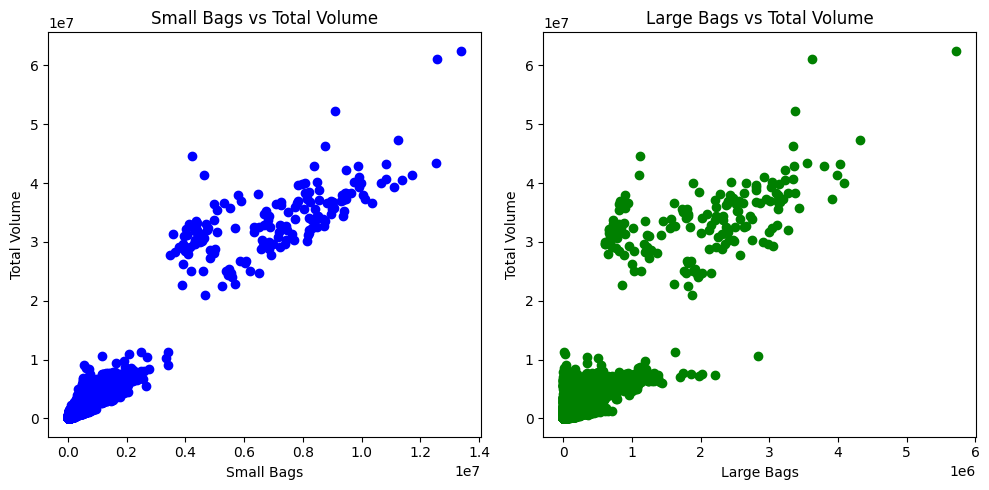

In [92]:
# Configurar la figura para los gráficos (10x5 pulgadas)
plt.figure(figsize=(10, 5))

# Primer gráfico: Small Bags vs Total Volume
plt.subplot(1, 2, 1)  # Configurar el primer subgráfico en la figura
plt.scatter(X[:, 0], y, color='blue')  # Graficar Small Bags en el eje X y Total Volume en el eje Y
plt.title('Small Bags vs Total Volume')  # Título del gráfico
plt.xlabel('Small Bags')  # Etiqueta del eje X
plt.ylabel('Total Volume')  # Etiqueta del eje Y

# Segundo gráfico: Large Bags vs Total Volume
plt.subplot(1, 2, 2)  # Configurar el segundo subgráfico en la figura
plt.scatter(X[:, 1], y, color='green')  # Graficar Large Bags en el eje X y Total Volume en el eje Y
plt.title('Large Bags vs Total Volume')  # Título del gráfico
plt.xlabel('Large Bags')  # Etiqueta del eje X
plt.ylabel('Total Volume')  # Etiqueta del eje Y

# Ajustar la disposición para evitar la superposición de los gráficos
plt.tight_layout()

# Mostrar los gráficos en pantalla
plt.show()

#Calculo de Regresion Lineal Multivariable

Normalizamos las caracteristicas

In [93]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma
print(f'Media (mu): {mu}')
print(f'Desviación estándar (sigma): {sigma}')

Media (mu): [182194.68669571  54338.08814456]
Desviación estándar (sigma): [746158.07031448 243959.28009054]


mostramos los valores normalizados

In [94]:
print(X_norm)

[[-0.2326465  -0.22235202]
 [-0.23156838 -0.22233464]
 [-0.23339891 -0.22231148]
 ...
 [-0.23164379 -0.22256082]
 [-0.22954271 -0.2225293 ]
 [-0.22811058 -0.22262764]]


mostramos la grafica con datos normalizados

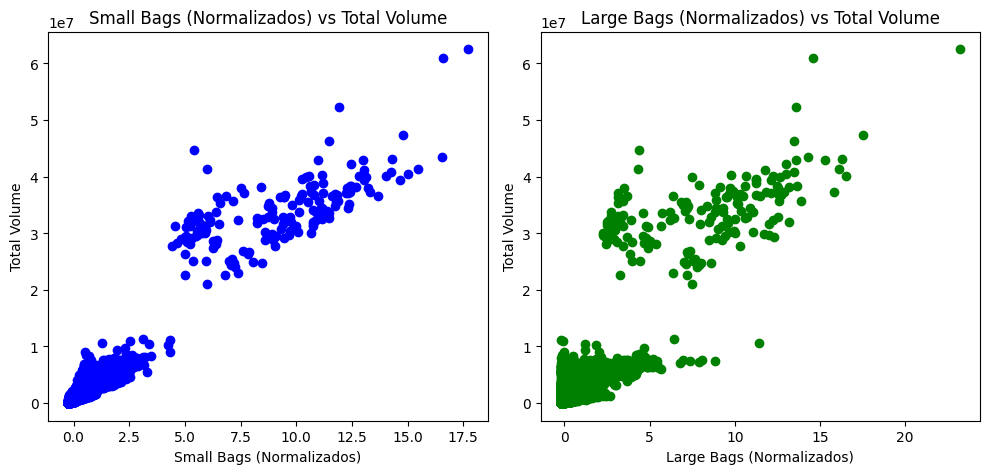

In [95]:
# Graficar Small Bags normalizados vs Total Volume
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_norm[:, 0], y, color='blue')
plt.title('Small Bags (Normalizados) vs Total Volume')
plt.xlabel('Small Bags (Normalizados)')
plt.ylabel('Total Volume')

# Graficar Large Bags normalizados vs Total Volume
plt.subplot(1, 2, 2)
plt.scatter(X_norm[:, 1], y, color='green')
plt.title('Large Bags (Normalizados) vs Total Volume')
plt.xlabel('Large Bags (Normalizados)')
plt.ylabel('Total Volume')

plt.tight_layout()
plt.show()

funcion de costo

In [96]:
def computeCostMulti(X, y, theta):
    m = len(y)  # Número de ejemplos
    J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J


Funcion del Desenso por el Gradiente

In [97]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)  # Número de ejemplos
    J_history = []  # Lista para almacenar el costo en cada iteración

    for i in range(num_iters):
        # Actualizar theta según la regla del descenso por gradiente
        theta = theta - (alpha / m) * np.dot(X.T, (np.dot(X, theta) - y))

        # Guardar el valor de la función de costo en cada iteración
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history


preparamos los datos para empezar la regresion multivariable

In [98]:
# Añadir una columna de unos a X_norm para el término de sesgo
X_with_bias = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)

# Inicializar theta (inicialmente con ceros)
theta = np.zeros(X_with_bias.shape[1])

# Definir los parámetros de descenso por gradiente
alpha = 0.01  # Tasa de aprendizaje
num_iters = 5000  # Número de iteraciones

# Ejecutar el descenso por gradiente
theta, J_history = gradientDescentMulti(X_with_bias, y, theta, alpha, num_iters)


mostramos la grafica del costo

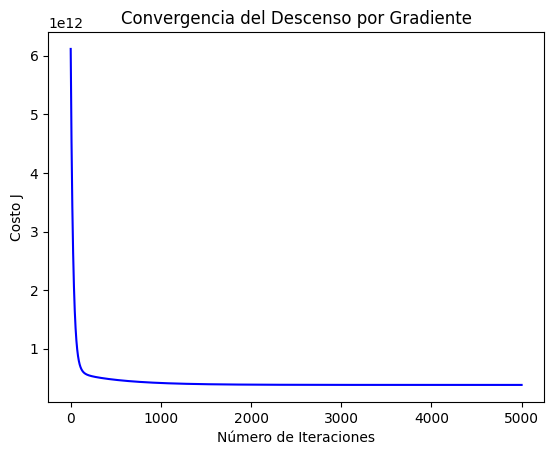

In [99]:
# Graficar la función de costo en cada iteración
plt.plot(range(len(J_history)), J_history, 'b')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del Descenso por Gradiente')
plt.show()

mejores valores de Theta

In [100]:
# Mostrar los valores de theta calculados
print('theta calculado por el descenso por el gradiente:', theta)


theta calculado por el descenso por el gradiente: [ 850644.01300893 3200387.61280997  153755.41711332]


realizamos las predicciones

In [108]:
# Nuevos datos para hacer predicciones
new_data = np.array([1, 546420.69, 24485.84])  # Incluye 1 para el término de sesgo, luego los valores normalizados
small_bags = new_data[1]
large_bags = new_data[2]

# Normalizar los nuevos datos usando la media y desviación estándar calculadas anteriormente
new_data[1:] = (new_data[1:] - mu) / sigma


print(f'Media (mu): {mu}')
print(f'Desviación estándar (sigma): {sigma}')
# Hacer la predicción usando el modelo ajustado
prediction = np.dot(new_data, theta)
print(small_bags)
print(large_bags)
# Mostrar la predicción
print(f'Predicción del volumen total para 24485.84 Small Bags y 546420.69 Large Bags: {prediction:.2f}')


Media (mu): [182194.68669571  54338.08814456]
Desviación estándar (sigma): [746158.07031448 243959.28009054]
546420.69
24485.84
Predicción del volumen total para 24485.84 Small Bags y 546420.69 Large Bags: 2394051.40


Error Porcentual

In [110]:
# Calcular el error porcentual
valor_real = 5621713.64 #valor real aproximado
error_porcentual = abs((valor_real - prediction) / valor_real) * 100

print(f'Predicción del volumen total para {small_bags} Small Bags y {large_bags} Large Bags: {prediction:.2f}')
print(f'Error porcentual: {error_porcentual:.2f}%')

Predicción del volumen total para 546420.69 Small Bags y 24485.84 Large Bags: 2394051.40
Error porcentual: 57.41%


#Regresion Lineal Multivariable (DescensoGradiente)

Volvemos a cargar los datos para evitar confuciones entre ejercicios

In [115]:
# Cargar los datos
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/avocado.csv')

# Seleccionar las características y la variable dependiente
X = data[['Small Bags', 'Large Bags']].values
y = data['Total Volume'].values

In [116]:
print(X)
print(y)

[[ 8603.62    93.25]
 [ 9408.07    97.49]
 [ 8042.21   103.14]
 ...
 [ 9351.8     42.31]
 [10919.54    50.  ]
 [11988.14    26.01]]
[ 64236.62  54876.98 118220.22 ...  13766.76  16205.22  17489.58]


Normalizamos los datos cargados

In [117]:
# Añadir el término de sesgo (intercepto)
X = np.c_[np.ones(X.shape[0]), X]  # Agrega una columna de 1's para el término de sesgo

# Calcular la media y desviación estándar para normalización
mu = np.mean(X[:, 1:], axis=0)
sigma = np.std(X[:, 1:], axis=0)

# Normalizar los datos
X[:, 1:] = (X[:, 1:] - mu) / sigma

datos normalizados

In [118]:
print(X)
print(y)

[[ 1.         -0.2326465  -0.22235202]
 [ 1.         -0.23156838 -0.22233464]
 [ 1.         -0.23339891 -0.22231148]
 ...
 [ 1.         -0.23164379 -0.22256082]
 [ 1.         -0.22954271 -0.2225293 ]
 [ 1.         -0.22811058 -0.22262764]]
[ 64236.62  54876.98 118220.22 ...  13766.76  16205.22  17489.58]


implementamos el descenso por el gradiente

In [119]:
def computeCost(X, y, theta):
    m = len(y)  # Número de ejemplos
    predictions = X.dot(theta)  # Predicciones
    sq_errors = (predictions - y) ** 2  # Error cuadrático
    J = (1 / (2 * m)) * np.sum(sq_errors)  # Función de coste
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)  # Número de ejemplos
    J_history = np.zeros(num_iters)  # Historial del coste

    for i in range(num_iters):
        # Actualizar theta
        theta = theta - (alpha / m) * (X.T.dot(X.dot(theta) - y))
        # Guardar el coste en cada iteración
        J_history[i] = computeCost(X, y, theta)

    return theta, J_history


alistamos los datos de inicio

In [121]:
# Inicializar parámetros
alpha = 0.01
num_iters = 5000
theta = np.zeros(X.shape[1])  # Inicializa theta con ceros

# Ejecutar el descenso por el gradiente
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Imprimir los resultados
print(f'Theta calculado por el descenso por el gradiente: {theta}')
print(f'Costo final: {J_history[-1]}')


Theta calculado por el descenso por el gradiente: [ 850644.01300893 3200387.61280997  153755.41711332]
Costo final: 382471498089.4732


grafica del costo del descenso por el gradiente

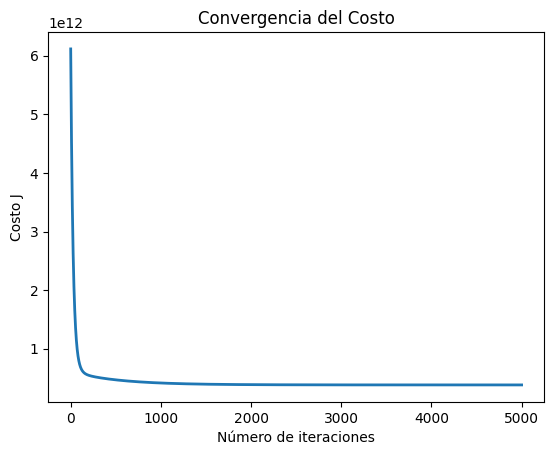

In [122]:
plt.plot(np.arange(num_iters), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del Costo')
plt.show()

realizamos predicciones

In [123]:
# Nuevos datos para hacer predicciones
new_data = np.array([1, 546420.69, 24485.84])  # Incluye 1 para el término de sesgo, luego los valores normalizados
small_bags = new_data[1]
large_bags = new_data[2]

# Normalizar los nuevos datos usando la media y desviación estándar calculadas anteriormente
new_data[1:] = (new_data[1:] - mu) / sigma


print(f'Media (mu): {mu}')
print(f'Desviación estándar (sigma): {sigma}')
# Hacer la predicción usando el modelo ajustado
prediction = np.dot(new_data, theta)
print(small_bags)
print(large_bags)
# Mostrar la predicción
print(f'Predicción del volumen total para 24485.84 Small Bags y 546420.69 Large Bags: {prediction:.2f}')


Media (mu): [182194.68669571  54338.08814456]
Desviación estándar (sigma): [746158.07031448 243959.28009054]
546420.69
24485.84
Predicción del volumen total para 24485.84 Small Bags y 546420.69 Large Bags: 2394051.40


calculo del error porcentual

In [124]:
# Calcular el error porcentual
valor_real = 5621713.64 #valor real aproximado
error_porcentual = abs((valor_real - prediction) / valor_real) * 100

print(f'Predicción del volumen total para {small_bags} Small Bags y {large_bags} Large Bags: {prediction:.2f}')
print(f'Error porcentual: {error_porcentual:.2f}%')

Predicción del volumen total para 546420.69 Small Bags y 24485.84 Large Bags: 2394051.40
Error porcentual: 57.41%


#Ecuacion de la Normal

In [125]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/avocado.csv')

# Seleccionar las características y la variable dependiente
X = data[['Small Bags', 'Large Bags']].values
y = data['Total Volume'].values

In [126]:
# Añadir el término de sesgo (intercepto)
X = np.c_[np.ones(X.shape[0]), X]  # Agrega una columna de 1's para el término de sesgo

normalizacion de los datos

In [127]:
# Calcular la media y desviación estándar para normalización
mu = np.mean(X[:, 1:], axis=0)
sigma = np.std(X[:, 1:], axis=0)

# Normalizar los datos
X[:, 1:] = (X[:, 1:] - mu) / sigma


implementamos la ecuacion de la normal

In [128]:
def normalEqn(X, y):
    # Calcula (X^T X)^-1 X^T y
    X_transpose = X.T
    theta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return theta


ejecutamos para obtener theta

In [129]:
# Calcular theta utilizando la ecuación normal
theta = normalEqn(X, y)

# Imprimir los resultados
print(f'Theta calculado por la ecuación normal: {theta}')


Theta calculado por la ecuación normal: [ 850644.01300893 3212132.22620807  142010.80371522]


realizamos predicciones por la ecuacion de la nomal

In [130]:
# Nuevos datos para hacer predicciones
new_data = np.array([1, 546420.69, 24485.84])  # Incluye 1 para el término de sesgo, luego los valores normalizados
small_bags = new_data[1]
large_bags = new_data[2]

# Normalizar los nuevos datos usando la media y desviación estándar calculadas anteriormente
new_data[1:] = (new_data[1:] - mu) / sigma


print(f'Media (mu): {mu}')
print(f'Desviación estándar (sigma): {sigma}')
# Hacer la predicción usando el modelo ajustado
prediction = np.dot(new_data, theta)
print(small_bags)
print(large_bags)
# Mostrar la predicción
print(f'Predicción del volumen total para 24485.84 Small Bags y 546420.69 Large Bags: {prediction:.2f}')


Media (mu): [182194.68669571  54338.08814456]
Desviación estándar (sigma): [746158.07031448 243959.28009054]
546420.69
24485.84
Predicción del volumen total para 24485.84 Small Bags y 546420.69 Large Bags: 2401221.50


calculo del error porcentual

In [131]:
 #Calcular el error porcentual
valor_real = 5621713.64 #valor real aproximado
error_porcentual = abs((valor_real - prediction) / valor_real) * 100

print(f'Predicción del volumen total para {small_bags} Small Bags y {large_bags} Large Bags: {prediction:.2f}')
print(f'Error porcentual: {error_porcentual:.2f}%')

Predicción del volumen total para 546420.69 Small Bags y 24485.84 Large Bags: 2401221.50
Error porcentual: 57.29%


#regrecion polinomial univariable por la ecuacion de la normal

Leemos los datos nuevamente

In [145]:
# Cargar datos
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/avocado.csv')
X = data.iloc[:, 3].values  # Ahora esta es la primera columna después de eliminar
y = data.iloc[:, 2].values  # Y esta es la segunda columna

m = y.size
X_original = X.copy()
X = np.concatenate([X.reshape(-1, 1), (X * X).reshape(-1, 1)], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

mostramos los datos cargados ya calculados

In [146]:
print(X)
print(y)

[[1.00000000e+00 6.42366200e+04 4.12634335e+09]
 [1.00000000e+00 5.48769800e+04 3.01148293e+09]
 [1.00000000e+00 1.18220220e+05 1.39760204e+10]
 ...
 [1.00000000e+00 1.37667600e+04 1.89523681e+08]
 [1.00000000e+00 1.62052200e+04 2.62609155e+08]
 [1.00000000e+00 1.74895800e+04 3.05885409e+08]]
[1.33 1.35 0.93 ... 1.87 1.93 1.62]


implementacion esta ecuacion de la normal

In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

predecimos

In [158]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1,625558.1,625558.1**2]
volumentotal= X_array[1]
print(volumentotal)
price = np.dot(X_array, theta)

print('Precio predecido para un volumen de 625558.1 (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.46109158e+00 -9.98754810e-08  2.35932882e-15]
625558.1
Precio predecido para un volumen de 625558.1 (usando la ecuación de la normal): $1


error porcentual

In [160]:
 #Calcular el error porcentual
valor_real = 1.14 #valor real aproximado
error_porcentual = abs((valor_real - price) / valor_real) * 100

print(f'Predicción del precio unitario para un volumen de {volumentotal} es: {price:.2f}')
print(f'Error porcentual: {error_porcentual:.2f}%')

Predicción del precio unitario para un volumen de 625558.1 es: 1.40
Error porcentual: 22.77%


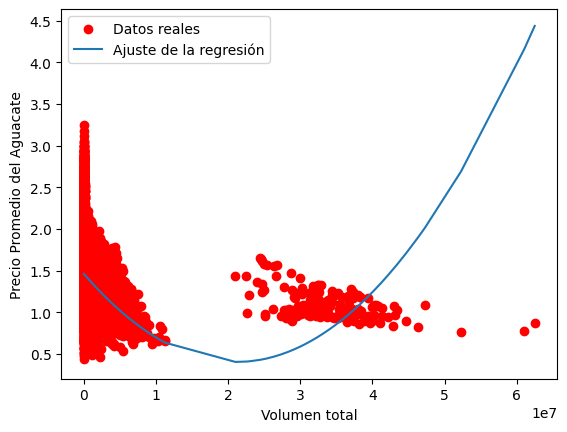

In [155]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Ordenar los datos por la segunda columna (volumen total)
sorted_indices = np.argsort(X[:, 1])
X_sorted = X[sorted_indices]
y_pred_sorted = np.dot(X_sorted, theta)

# Graficar los puntos y la curva
plt.scatter(X[:, 1], y, color='red', label='Datos reales')
plt.plot(X_sorted[:, 1], y_pred_sorted, label='Ajuste de la regresión')
plt.xlabel('Volumen total')
plt.ylabel('Precio Promedio del Aguacate')
plt.legend()
plt.show()